# PROJECT USING HABERMAN'S SURVIVAL DATASET
The dataset contains cases ranging from 1958-1970 from a study conducted at University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

### Importing required libraries

In [1]:
import pandas as pnd
import matplotlib.pyplot as pltlb
import seaborn as sns

In [2]:
columns = ['Age', 'Op_Year', 'axil_nodes', 'Surv_status']
url = 'https://raw.githubusercontent.com/Vaishu5F6/Haberman-Project/main/haberman.csv'
df = pnd.read_csv(url, header=None, names=columns)
df.head()

,Age,Op_Year,axil_nodes,Surv_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [3]:
df.head()

,Age,Op_Year,axil_nodes,Surv_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Age          306 non-null    int64
 1   Op_Year      306 non-null    int64
 2   axil_nodes   306 non-null    int64
 3   Surv_status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [5]:
df.shape

(306, 4)

In [6]:
df.describe()

,Age,Op_Year,axil_nodes,Surv_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [7]:
df.isnull().sum()

Age            0
Op_Year        0
axil_nodes     0
Surv_status    0
dtype: int64

In [8]:
srv_lst = df["Surv_status"].value_counts()
print(srv_lst)

1    225
2     81
Name: Surv_status, dtype: int64


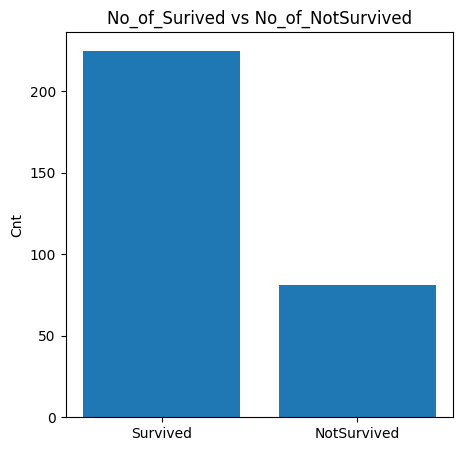

In [9]:
#Plotting bar graph for survival status
fig = pltlb.figure(figsize=(5,5))
pltlb.ylabel("Cnt")
pltlb.title("No_of_Surived vs No_of_NotSurvived")
pltlb.bar(["Survived","NotSurvived"],srv_lst)
pltlb.show()

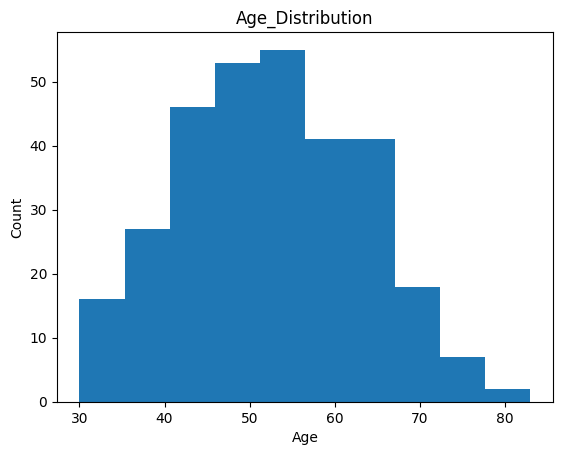

In [10]:
#Age distribution
pltlb.hist(df["Age"])
pltlb.xlabel("Age")
pltlb.ylabel("Count")
pltlb.title("Age_Distribution")
pltlb.show()

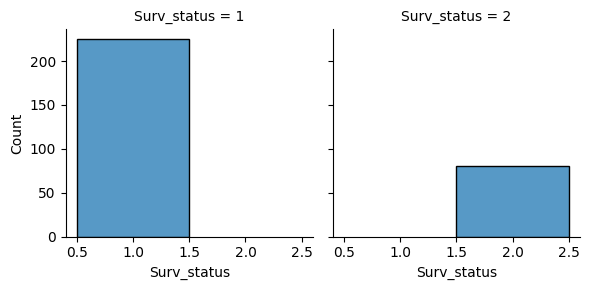

In [11]:
hist_plot = sns.FacetGrid(df, col="Surv_status")
hist_plot.map(sns.histplot, "Surv_status")

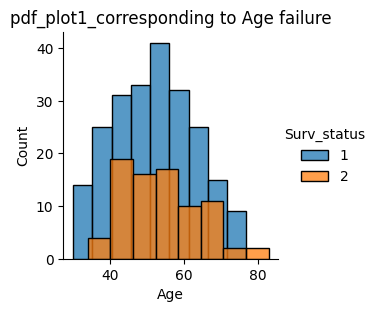

In [12]:
# Probability Density Function
sns.FacetGrid(df, hue="Surv_status").map(sns.histplot,'Age').add_legend();
pltlb.title('pdf_plot1_corresponding to Age failure')
pltlb.show()

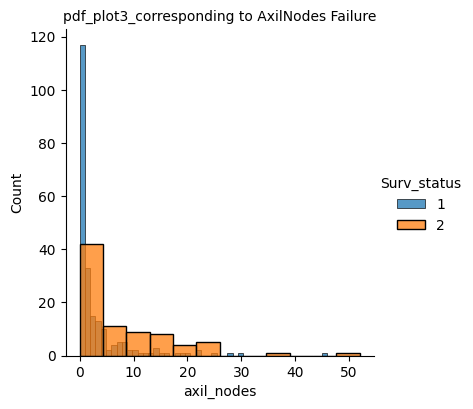

In [13]:
# axil nodes
sns.FacetGrid(df,hue="Surv_status",height=4).map(sns.histplot,"axil_nodes").add_legend()
pltlb.title('pdf_plot3_corresponding to axilnodes Failure', fontsize=10)
pltlb.show()

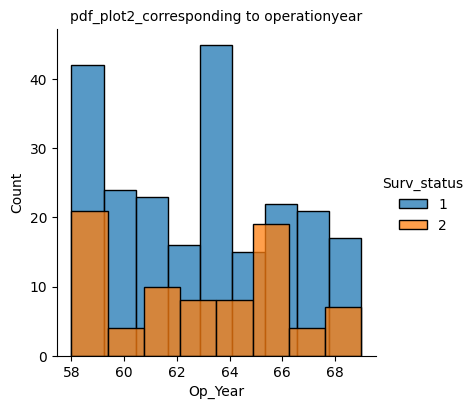

In [14]:
# year
sns.FacetGrid(df, hue="Surv_status",height=4).map(sns.histplot,'Op_Year').add_legend();
pltlb.title('pdf_plot2_corresponding to operationyear',fontsize=10)
pltlb.show()

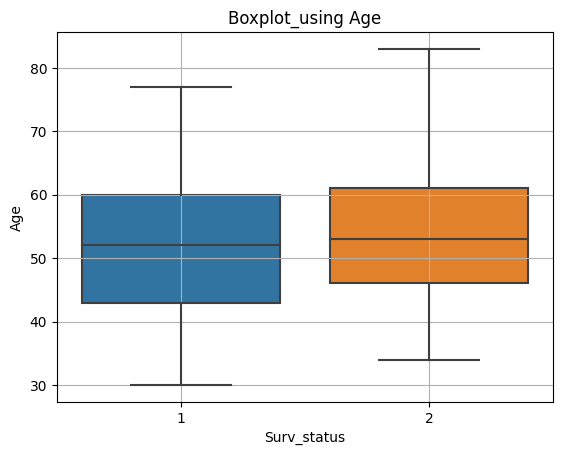

In [15]:
#box plot
sns.boxplot(x='Surv_status',y='Age',data=df)
pltlb.grid()
pltlb.title('Boxplot_using Age')
pltlb.show()

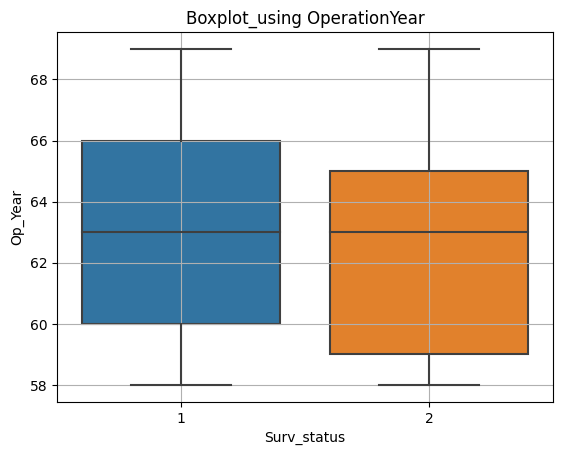

In [16]:
#box plot
sns.boxplot(x='Surv_status',y='Op_Year',data=df)
pltlb.grid()
pltlb.title('Boxplot_using OperationYear')
pltlb.show()

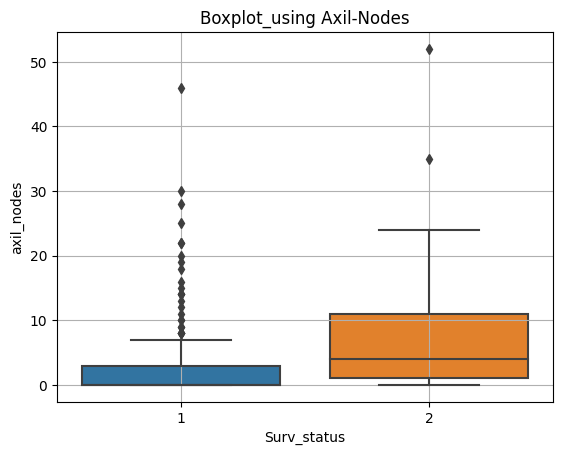

In [17]:
#box plot
sns.boxplot(x='Surv_status',y='axil_nodes',data=df)
pltlb.grid()
pltlb.title('Boxplot_using Axil-Nodes')
pltlb.show()

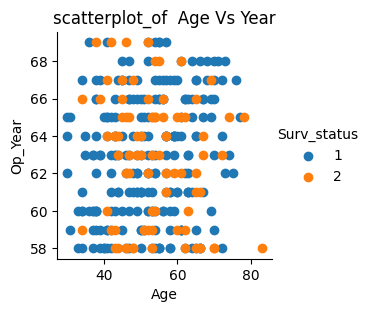

In [18]:
#SCATTER PLOT
sns.FacetGrid(df,hue="Surv_status",).map(pltlb.scatter,"Age", "Op_Year").add_legend()
pltlb.title("scatterplot_of  Age Vs Year")
pltlb.show()

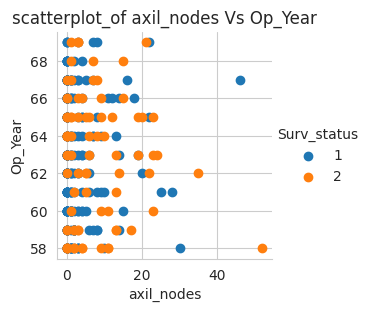

In [19]:
sns.set_style("whitegrid")
sns.FacetGrid(df,hue="Surv_status").map(pltlb.scatter,"axil_nodes", "Op_Year").add_legend()
pltlb.title("scatterplot_of axil_nodes Vs Op_Year")
pltlb.show()

# Splitting training and test dataset

In [20]:
from sklearn.model_selection import train_test_split
x = df.iloc[:,:2]
y = df["Surv_status"]
x_trn, x_tst, y_trn, y_tst= train_test_split(x, y, test_size= 0.20, random_state=0)


In [21]:
#feature Scaling
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()
x_trn= st_x.fit_transform(x_trn)
x_tst= st_x.transform(x_tst)

# Model Building

# Knn

In [22]:
from sklearn.neighbors import KNeighborsClassifier
clsfr_knn= KNeighborsClassifier(n_neighbors=8, metric='minkowski', p=4 )
clsfr_knn.fit(x_trn, y_trn)

KNeighborsClassifier(n_neighbors=8, p=4)

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [24]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(clsfr_knn,x,y,cv=8))
#Train
knn_prdct= clsfr_knn.predict(x_trn)
scr_knn= metrics.accuracy_score(y_trn,knn_prdct)
print("The Model_Accuracy is", scr_knn)

[0.74358974 0.71794872 0.57894737 0.71052632 0.71052632 0.73684211
 0.65789474 0.73684211]
The Model_Accuracy is 0.7868852459016393


In [25]:
#Test
knn_prdct= clsfr_knn.predict(x_tst)
scr_knn_1= metrics.accuracy_score(y_tst,knn_prdct)
print(cross_val_score(clsfr_knn,x,y,cv=8)) #perform cross validation
print("The Model_Accuracy is", scr_knn_1)

[0.74358974 0.71794872 0.57894737 0.71052632 0.71052632 0.73684211
 0.65789474 0.73684211]
The Model_Accuracy is 0.5806451612903226


# Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier
clsfr_tr = DecisionTreeClassifier(criterion='entropy', random_state=0)
clsfr_tr.fit(x_trn, y_trn)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [27]:
#Train
tr_prdct= clsfr_tr.predict(x_trn)
scr_tr= metrics.accuracy_score(y_trn,tr_prdct)
print("The Model_Accuracy is", scr_tr)
print(cross_val_score(clsfr_tr,x,y,cv=8))  #perform cross validation

The Model_Accuracy is 0.9262295081967213
[0.76923077 0.23076923 0.31578947 0.63157895 0.63157895 0.73684211
 0.47368421 0.28947368]


In [28]:
#Test
tr_prdct= clsfr_tr.predict(x_tst)
scr_tr1 = metrics.accuracy_score(y_tst,tr_prdct)
print("The Model_Accuracy is", scr_tr1)

The Model_Accuracy is 0.5967741935483871


# Support vector Machine

In [29]:
from sklearn.svm import SVC
clsfr_svc = SVC(kernel='linear', random_state=0)
clsfr_svc.fit(x_trn, y_trn)

SVC(kernel='linear', random_state=0)

In [30]:
#Train
from sklearn.metrics import confusion_matrix
svc_prdct= clsfr_svc.predict(x_trn)
cnfm= confusion_matrix(y_trn,svc_prdct )
scr_svc= metrics.accuracy_score(y_trn,svc_prdct)
print("The Model_Accuracy is", scr_svc)
print(cnfm)
print(cross_val_score(clsfr_svc,x,y,cv=8)) #perform cross validation

The Model_Accuracy is 0.7704918032786885
[[188   0]
 [ 56   0]]
[0.74358974 0.71794872 0.73684211 0.73684211 0.73684211 0.73684211
 0.73684211 0.73684211]


In [31]:
#Test
svc_prdct= clsfr_svc.predict(x_tst)
cnfm= confusion_matrix(y_tst, svc_prdct)
scr_svc_1= metrics.accuracy_score(y_tst,svc_prdct)
print("The Model_Accuracy is", scr_svc_1)
print(cnfm)

The Model_Accuracy is 0.5967741935483871
[[37  0]
 [25  0]]


# Random Forest Classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier
clsfr_rndm= RandomForestClassifier(n_estimators= 14, criterion="entropy")
clsfr_rndm.fit(x_trn, y_trn)

RandomForestClassifier(criterion='entropy', n_estimators=14)

In [33]:
#Train
from sklearn.metrics import confusion_matrix
rndm_prdct= clsfr_rndm.predict(x_trn)
cnfm= confusion_matrix(y_trn,rndm_prdct )
scr_rndm= metrics.accuracy_score(y_trn,rndm_prdct)
print("The Model_Accuracy is", scr_rndm)
print(cnfm)
print(cross_val_score(clsfr_rndm,x,y,cv=8))  #perform cross validation

The Model_Accuracy is 0.889344262295082
[[178  10]
 [ 17  39]]
[0.76923077 0.38461538 0.44736842 0.65789474 0.52631579 0.73684211
 0.55263158 0.65789474]


In [34]:
#Test
rndm_prdct= clsfr_rndm.predict(x_tst)
cnfm= confusion_matrix(y_tst, rndm_prdct)
scr_rndm_1= metrics.accuracy_score(y_tst,svc_prdct)
print("The Model_Accuracy is", scr_rndm_1)
print(cnfm)

The Model_Accuracy is 0.5967741935483871
[[35  2]
 [21  4]]


# Gaussian NB

In [35]:
from sklearn.naive_bayes import GaussianNB
clsfr_GNB = GaussianNB()
clsfr_GNB.fit(x_trn,y_trn)

GaussianNB()

In [36]:
#Train
from sklearn.metrics import confusion_matrix
GNB_prdct= clsfr_GNB.predict(x_trn)
cnfm= confusion_matrix(y_trn,GNB_prdct )
scr_GNB= metrics.accuracy_score(y_trn,GNB_prdct)
print("The Model_Accuracy is", scr_GNB)
print(cnfm)
print(cross_val_score(clsfr_GNB,x,y,cv=8))  #perform cross validation

The Model_Accuracy is 0.7704918032786885
[[188   0]
 [ 56   0]]
[0.74358974 0.71794872 0.73684211 0.73684211 0.73684211 0.73684211
 0.73684211 0.73684211]


In [37]:
#Test
GNB_prdct= clsfr_rndm.predict(x_tst)
cnfm= confusion_matrix(y_tst, GNB_prdct)
scr_GNB_1= metrics.accuracy_score(y_tst,GNB_prdct)
print("The Model_Accuracy is", scr_GNB_1)
print(cnfm)

The Model_Accuracy is 0.6290322580645161
[[35  2]
 [21  4]]


# Pretty Table

In [38]:
from prettytable import PrettyTable
Tbl = PrettyTable(["Algorithm_Used", "Train_Accuracy","Test_Accuracy"])
Tbl.add_row(["gaussian_NB", scr_GNB, scr_GNB_1])
Tbl.add_row(["Support_Vector", scr_svc,scr_svc_1])
Tbl.add_row([" KNN ", scr_knn,scr_knn_1])
Tbl.add_row(["Random_Forest", scr_rndm, scr_rndm_1])
Tbl.add_row(["Decision_Tree", scr_tr,scr_tr1])
print(Tbl)

+----------------+--------------------+--------------------+
| Algorithm_Used |   Train_Accuracy   |   Test_Accuracy    |
+----------------+--------------------+--------------------+
|  gaussian_NB   | 0.7704918032786885 | 0.6290322580645161 |
| Support_Vector | 0.7704918032786885 | 0.5967741935483871 |
|      KNN       | 0.7868852459016393 | 0.5806451612903226 |
| Random_Forest  | 0.889344262295082  | 0.5967741935483871 |
| Decision_Tree  | 0.9262295081967213 | 0.5967741935483871 |
+----------------+--------------------+--------------------+
